# Import Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import wavfile
from scipy import signal
from scipy.signal import butter,filtfilt,lfilter
import librosa

# Question 1

_Read each of the images._

In [2]:
lena = cv2.imread("Q1/lena_grayscale.jpg", cv2.IMREAD_GRAYSCALE)
# cv2.imshow("Lena Forsen by Dwight Hooker - Playboy, November 1972", lena)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
fabric = cv2.imread("Q1/fabric_grayscale.jpg", cv2.IMREAD_GRAYSCALE)
# cv2.imshow("Fabric Pattern", fabric)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

_Calculate 2D Fourier representations of these images. Decompose these representations into its magnitudes and phases._

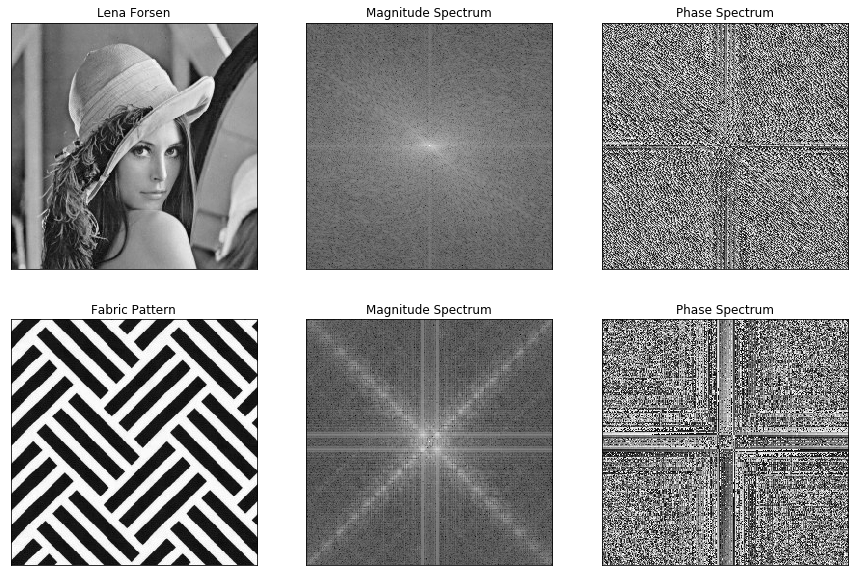

In [3]:
lena_fft = np.fft.fft2(lena)
lena_shift = np.fft.fftshift(lena_fft)    # Shift center of the image
lena_magnitude = 20*np.log(np.abs(lena_shift))
lena_phase = np.angle(lena_shift)

fabric_fft = np.fft.fft2(fabric)
fabric_shift = np.fft.fftshift(fabric_fft)
fabric_magnitude = 20*np.log(np.abs(fabric_shift))
fabric_phase = np.angle(fabric_shift)

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(lena, cmap = "gray")
ax1.set_title("Lena Forsen"), ax1.set_xticks([]), ax1.set_yticks([])

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(lena_magnitude, cmap = "gray")
ax2.set_title("Magnitude Spectrum"), ax2.set_xticks([]), ax2.set_yticks([])

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(lena_phase, cmap = "gray")
ax3.set_title("Phase Spectrum"), ax3.set_xticks([]), ax3.set_yticks([])

ax4 = fig.add_subplot(gs[1, 0])
ax4.imshow(fabric, cmap = "gray")
ax4.set_title("Fabric Pattern"), ax4.set_xticks([]), ax4.set_yticks([])

ax5 = fig.add_subplot(gs[1, 1])
ax5.imshow(fabric_magnitude, cmap = "gray")
ax5.set_title("Magnitude Spectrum"), ax5.set_xticks([]), ax5.set_yticks([])

ax6 = fig.add_subplot(gs[1, 2])
ax6.imshow(fabric_phase, cmap = "gray")
ax6.set_title("Phase Spectrum"), ax6.set_xticks([]), ax6.set_yticks([])
plt.show()

_What kind of operation is needed to recreate the original images from magnitude and phase information?_
* Inverse Fourier Transform is required to recreate the original images

_Recreate the images and show them._

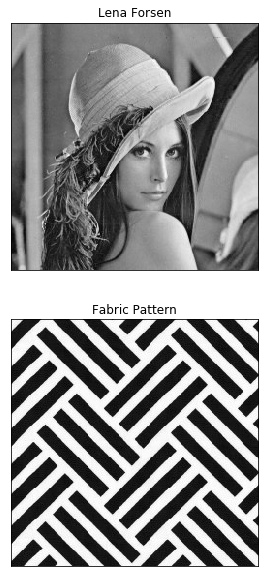

In [4]:
lena_ishift = np.fft.ifftshift(lena_shift)
lena_ifft = np.fft.ifft2(lena_ishift)
lena_ifft = np.abs(lena_ifft)

fabric_ishift = np.fft.ifftshift(fabric_shift)
fabric_ifft = np.fft.ifft2(fabric_ishift)
fabric_ifft = np.abs(fabric_ifft)

fig = plt.figure(figsize=(5, 10))
gs = gridspec.GridSpec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(lena_ifft, cmap = "gray")
ax1.set_title("Lena Forsen"), ax1.set_xticks([]), ax1.set_yticks([])

ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(fabric_ifft, cmap = "gray")
ax2.set_title("Fabric Pattern"), ax2.set_xticks([]), ax2.set_yticks([])
plt.show()

_Obtain new images by using one image’s phase and other image’s magnitude information._

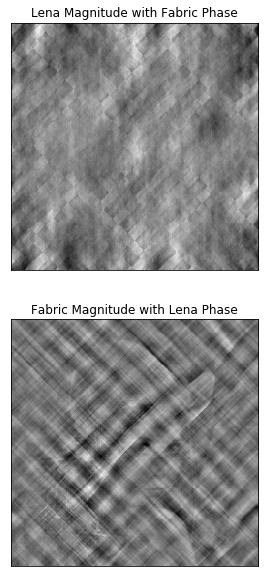

In [5]:
lena_magnitude = np.abs(lena_shift)
fabric_phase = np.exp(1j*np.angle(fabric_shift))
new_lena_fft = lena_magnitude * fabric_phase
new_lena_ishift = np.fft.ifftshift(new_lena_fft)
new_lena_ifft = np.fft.ifft2(new_lena_ishift).real
# new_lena_ifft = np.abs(new_lena_ifft)
new_lena_ifft = np.uint8((new_lena_ifft - np.min(new_lena_ifft))/(np.max(new_lena_ifft)-np.min(new_lena_ifft))*255)
cv2.imwrite("Q1/lena_mag_fabric_phase.jpg", new_lena_ifft)

fabric_magnitude = np.abs(fabric_shift)
lena_phase = np.exp(1j*np.angle(lena_shift))
new_fabric_fft = fabric_magnitude * lena_phase
new_fabric_ishift = np.fft.ifftshift(new_fabric_fft)
new_fabric_ifft = np.fft.ifft2(new_fabric_ishift).real
# new_fabric_ifft = np.abs(new_fabric_ifft)
new_fabric_ifft = np.uint8((new_fabric_ifft - np.min(new_fabric_ifft))/(np.max(new_fabric_ifft)-np.min(new_fabric_ifft))*255)
cv2.imwrite("Q1/fabric_mag_lena_phase.jpg", new_fabric_ifft)

fig = plt.figure(figsize=(5, 10))
gs = gridspec.GridSpec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(new_lena_ifft, cmap = "gray")
ax1.set_title("Lena Magnitude with Fabric Phase"), ax1.set_xticks([]), ax1.set_yticks([])

ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(new_fabric_ifft, cmap = "gray")
ax2.set_title("Fabric Magnitude with Lena Phase"), ax2.set_xticks([]), ax2.set_yticks([])
plt.show()

_Explain the effect of using this type of operation on the images. Which effects on the images are related with phase information?_
* This operation renders images in an unaccustomed manner. Moreover, magnitude carries more information about our signal when it comes to audio. Quite the contrary, phase conveys more information regarding signal structure than magnitude does, especially in the case of images. It is clear that reconstruction with the phase gives the new image the edges of the original image.

# Question 2

In [6]:
spectrogram = np.load("Q2/spectrogram.npy")
phase = np.load("Q2/phases.npy")

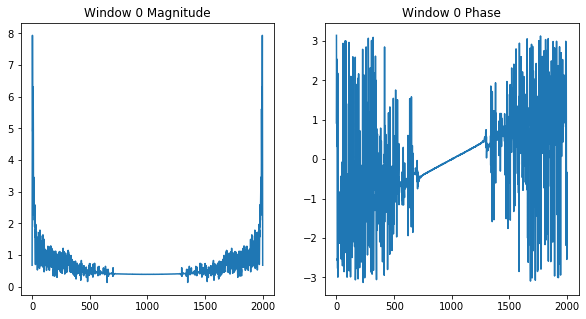

In [7]:
amplitude = 1
example_magn = np.concatenate((spectrogram, np.flip(spectrogram, 1)), 1)[0, :]
example_magn = np.exp(example_magn/10)
example_magn *= amplitude
example_phase = phase[0, :]

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(example_magn)
ax1.set_title("Window 0 Magnitude")

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(example_phase)
ax2.set_title("Window 0 Phase")
plt.show()

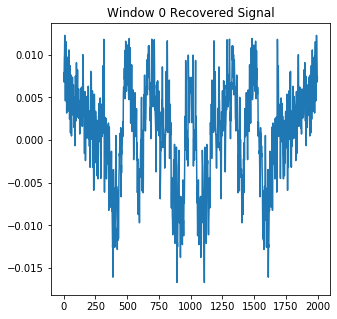

In [8]:
example_fft = example_magn*example_phase
example_ifft = np.fft.ifft(example_fft).real

fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(1, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(example_ifft)
ax1.set_title("Window 0 Recovered Signal")
plt.show()

_Plot the spectrogram in linear scale (Spectrogram A)._

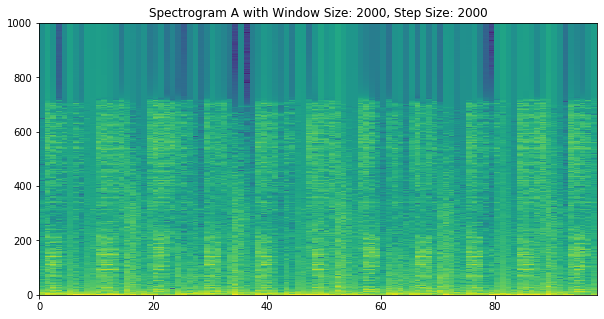

In [9]:
spectrogram_2000 = np.concatenate((spectrogram, np.flip(spectrogram, 1)), 1)

fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.pcolormesh(np.transpose(spectrogram_2000)[:spectrogram_2000.shape[1]//2])
ax1.set_yscale("linear")
# ax1.axis('off')
ax1.set_title("Spectrogram A with Window Size: 2000, Step Size: 2000")
plt.show()

_Reobtain the audio using the given information._

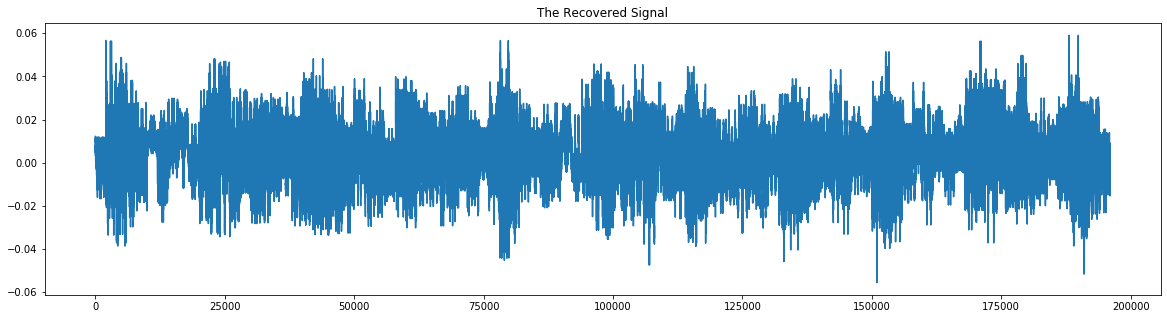

In [10]:
amplitude = 1
window_length = spectrogram.shape[1]*2
window_amount = spectrogram.shape[0]
recovered = np.empty(window_amount*window_length)

for idx in range(window_amount):
    recovered[idx*window_length:(idx+1)*window_length] = np.fft.ifft((amplitude*np.exp(np.concatenate((spectrogram, np.flip(spectrogram, 1)), 1)[idx, :]/10))*phase[idx, :]).real
    
fig = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(1, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(recovered)
ax1.set_title("The Recovered Signal")
plt.show()

In [11]:
from scipy.io.wavfile import write
import IPython.display as ipd
samplerate = 44100
write("Q2/recovered.wav", samplerate, recovered)
ipd.Audio(recovered, rate=samplerate)

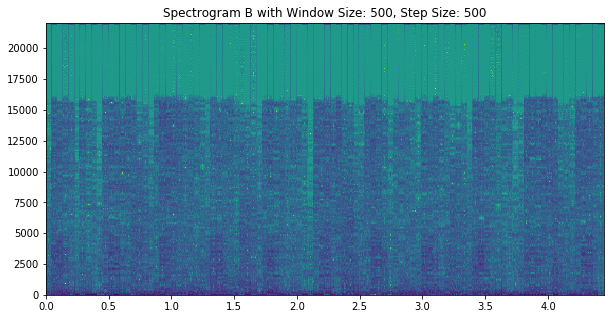

In [12]:
import scipy.signal
freq, time, output = scipy.signal.stft(recovered, fs=44100, window='hann', nperseg=500)
output = 10 * np.log(output + 0.00001)
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.pcolormesh(time, freq, np.abs(output))
ax1.set_yscale("linear")
ax1.set_title("Spectrogram {} with Window Size: {}, Step Size: {}".format("B", 500, 500))
plt.show()

_Use Hann windows with sizes 500 (Spectrogram B), 2000 (Spectrogram C), 4000 (Spectrogram D) to obtain new spectrograms. Let step size be equal to window size._

In [13]:
def plot_spectrogram(signal, window_size, stride, letter):
    eps = 0.0001
    window = np.hanning(window_size)
    signal = signal/max(abs(signal))
#     signal = np.convolve(signal, window)
    signal_length = signal.shape[0]
    output = np.empty([signal_length//stride, window_size])

    for idx in range(output.shape[0]):
        output[idx] = np.abs(np.fft.fft(signal[idx*stride:idx*stride+window_size]*window))
    output = 10 * np.log(output + eps)
        
    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(1, 1)

    ax1 = fig.add_subplot(gs[0, 0])
    ax1.pcolormesh(np.transpose(output)[:output.shape[1]//2])
    ax1.set_yscale("linear")
#     ax1.axis('off')
    ax1.set_title("Spectrogram {} with Window Size: {}, Step Size: {}".format(letter, window_size, stride))
    plt.show()

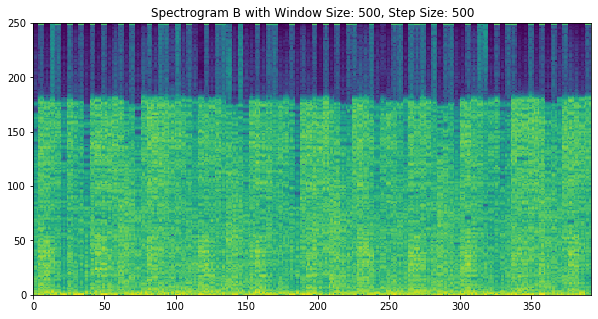

In [14]:
plot_spectrogram(recovered, 500, 500, letter='B')

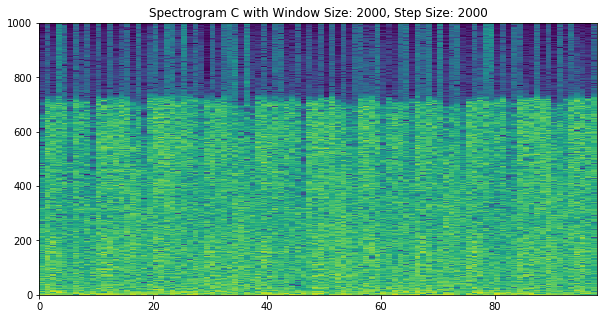

In [15]:
plot_spectrogram(recovered, 2000, 2000, letter='C')

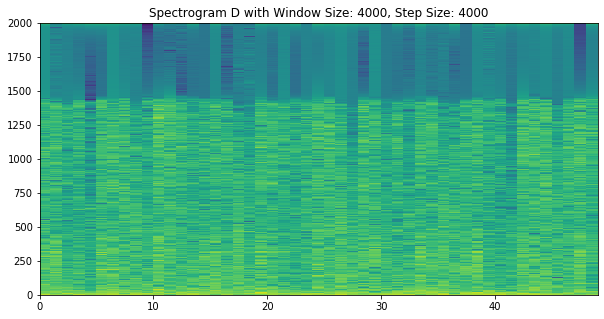

In [16]:
plot_spectrogram(recovered, 4000, 4000, letter='D')

_Compare the four spectrograms. Explain the differences and the reasons for them if any._
* When comparing spectrograms B through D, the length of the window is decreased. So, the ability to resolve frequencies degrades. Therefore as the window size gets smaller, resolution of the vertical axis gets worse. On the other hand, as the window size gets smaller, temporal resolution on the horizontal axis gets better. So called "temporal blurring" weakens.
* When comparing spectrograms A and C, plots are different due to different windows used during STFT. The Hann window used on spectrogram C has bell curve whereas the rectangular window used on spectrogram A has a rectangular shape.

# Question 3

_Depreciated answer to convolution of $x(t)$ and $y(t)$ by hand_

$$y'(t) = \int_{-\infty}^{\infty}x(\tau)y(t-\tau)\mathrm{d}\tau = \int_{-\infty}^{\infty}sin(\frac{3\pi t}{4}+\frac{\pi}{2})sin(\frac{\pi(t-\tau)}{4}+\frac{3\pi}{5})\mathrm{d}\tau \Rightarrow \int_{0}^{t}sin(\frac{3\pi t}{4}+\frac{\pi}{2})sin(\frac{\pi(t-\tau)}{4}+\frac{3\pi}{5})\mathrm{d}\tau$$
$$y'(t) = \int_{0}^{t}\frac{1}{2} (cos(\frac{\pi t}{4}-\pi\tau+\frac{\pi}{10})+cos(\frac{\pi t}{4}+\frac{\pi\tau}{2}+\frac{\pi}{10})) \mathrm{d}\tau = \frac{1}{\pi}\int_{\frac{\pi t}{4}+\frac{\pi}{10}}^{\frac{3\pi t}{4}+\frac{\pi}{10}}cos(u)\mathrm{d}u + \frac{-1}{2\pi}\int_{\frac{\pi t}{4}+\frac{\pi}{10}}^{-\frac{3\pi t}{4}+\frac{\pi}{10}}cos(u)\mathrm{d}u$$
$$y'(t) = \frac{sin(u)}{\pi}\Biggr|_{\frac{\pi t}{4}+\frac{\pi}{10}}^{\frac{3\pi t}{4}+\frac{\pi}{10}} + \frac{-sin(u)}{2\pi}\Biggr|_{\frac{\pi t}{4}+\frac{\pi}{10}}^{-\frac{3\pi t}{4}+\frac{\pi}{10}} = \frac{-1}{2\pi}\Biggr( sin\biggr(\frac{1}{20}\pi(5t+2)\biggr) - 2sin\biggr(\frac{1}{20}\pi(15t+2)\biggr) + cos\biggr(\frac{1}{20}\pi(15t+8)\biggr) \Biggr)$$

In [17]:
def convolution_range(a, b):    # Calculates the range of convolution operations
    return np.arange(-(len(a)+len(b))/2,(len(a)+len(b))/2-1)

_Let $x = sin( \frac{3\pi t}{4} + \frac{\pi}{2})$ and $y = sin( \frac{\pi t}{4} + \frac{3\pi}{5} )$._

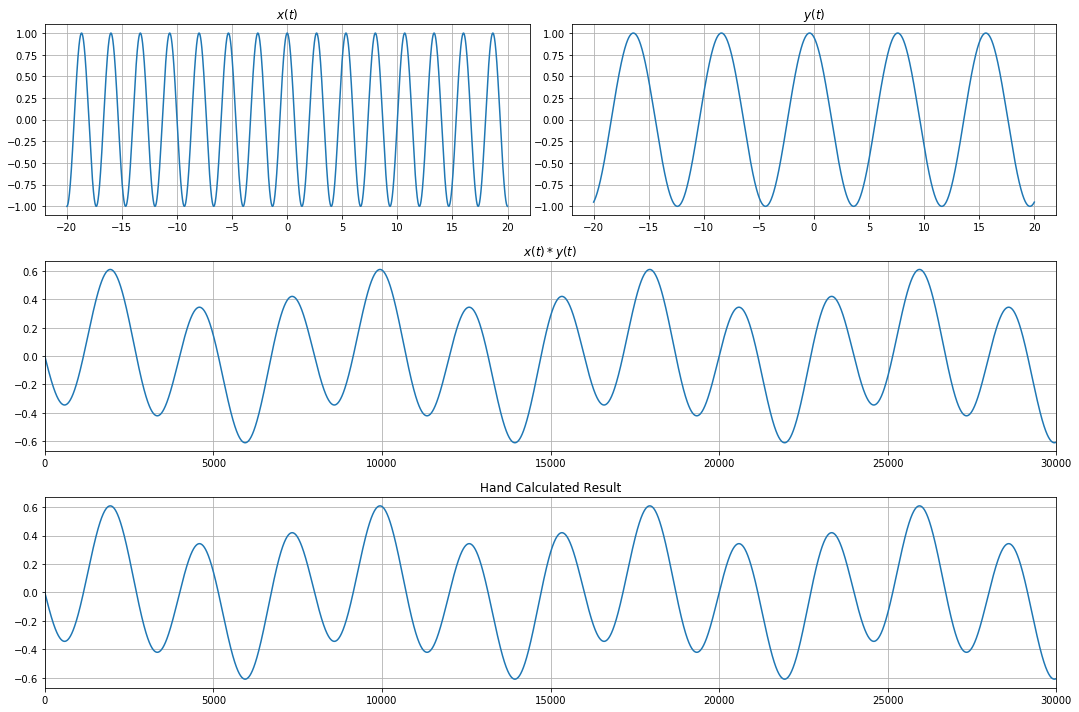

In [18]:
delta = 0.001
# t = np.arange(-5*np.pi, 5*np.pi, delta)
t = np.arange(-20, 20, delta)
x = np.sin(3*np.pi*t/4 + np.pi/2)
y = np.sin(np.pi*t/4 + 3*np.pi/5)
result = (-1/(2*np.pi))*(np.sin(1/20*np.pi*(5*t+2))-2*np.sin(1/20*np.pi*(15*t+2))+np.cos(1/20*np.pi*(15*t+8)))

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(t, x)
ax1.grid()
ax1.set_title("$x(t)$")

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, y)
ax2.grid()
ax2.set_title("$y(t)$")

ax3 = fig.add_subplot(gs[1, :])
ax3.plot(convolution_range(x, y), np.convolve(x, y)/1000)
ax3.grid()
ax3.set_xlim(left=0, right=30000)
ax3.set_title("$x(t)*y(t)$")

ax4 = fig.add_subplot(gs[2, :])
ax4.plot(result)
ax4.grid()
ax4.set_xlim(left=0, right=30000)
ax4.set_title("Hand Calculated Result")

gs.tight_layout(fig)
plt.show()

_Sample these two signals using 5 different sampling frequencies. Plot these sampled signals. Among them which are more relatable to the original signals. Show undersampled and oversampled examples. Illustrates the phenomenon of aliasing._
* The ones that are sampled according to the Nyquist-Shannon sampling theorem are more relatable to the original signals. In other words, plots with the titles "Correctly Sampled" and "Oversampled" are better representations of the original signal. Best representation points of phenomenon of aliasing are marked with blue diamonds in the undersampled signals.

_What are the minimum sampling rates to show these signals? Why?_
* Sampling rates are given with the plots. According to the Nyquist-Shannon sampling theorem, the minimum required sampling frequency of a signals is two times of the maximum frequency component in the signal.

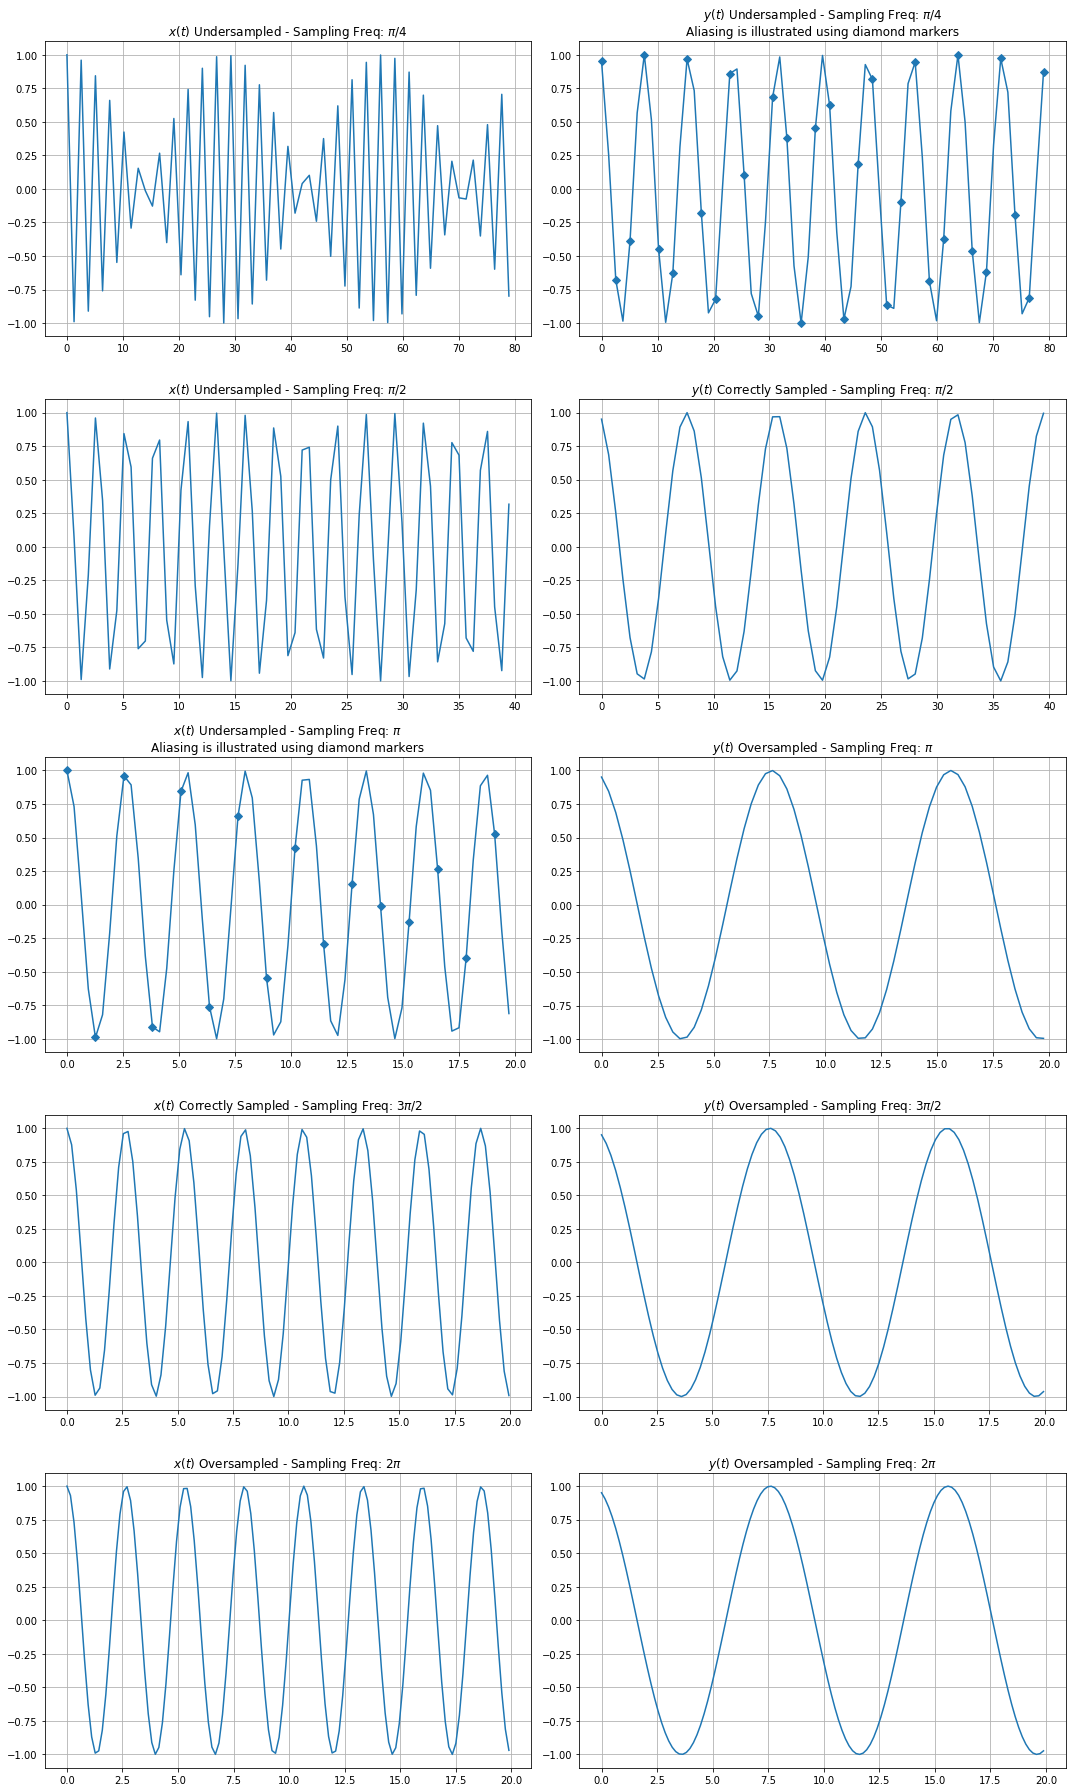

In [19]:
# Please note that all the frequencies are represented as angular frequencies
fig = plt.figure(figsize=(15, 25))
gs = gridspec.GridSpec(5, 2)

sample_freq = np.pi/4
sample_period = 1/sample_freq
duration = 80
length = sample_freq * duration
t = np.arange(length)*sample_period
x2 = np.sin(3*np.pi*t/4 + np.pi/2)
y2 = np.sin(np.pi*t/4 + 3*np.pi/5)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(t, x2)
ax1.grid()
ax1.set_title("$x(t)$ Undersampled - Sampling Freq: $\pi/4$")

aliasing_markers1 = 2
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, y2, '-D', markevery=aliasing_markers1)
ax2.grid()
ax2.set_title("$y(t)$ Undersampled - Sampling Freq: $\pi/4$\nAliasing is illustrated using diamond markers")

sample_freq = np.pi/2
sample_period = 1/sample_freq
duration = 40
length = sample_freq * duration
t = np.arange(length)*sample_period
x2 = np.sin(3*np.pi*t/4 + np.pi/2)
y2 = np.sin(np.pi*t/4 + 3*np.pi/5)

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(t, x2)
ax3.grid()
ax3.set_title("$x(t)$ Undersampled - Sampling Freq: $\pi/2$")

ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(t, y2)
ax4.grid()
ax4.set_title("$y(t)$ Correctly Sampled - Sampling Freq: $\pi/2$")

sample_freq = np.pi
sample_period = 1/sample_freq
duration = 20
length = sample_freq * duration
t = np.arange(length)*sample_period
x2 = np.sin(3*np.pi*t/4 + np.pi/2)
y2 = np.sin(np.pi*t/4 + 3*np.pi/5)

aliasing_markers2 = 4
ax5 = fig.add_subplot(gs[2, 0])
ax5.plot(t, x2, '-D', markevery=aliasing_markers2)
ax5.grid()
ax5.set_title("$x(t)$ Undersampled - Sampling Freq: $\pi$\nAliasing is illustrated using diamond markers")

ax6 = fig.add_subplot(gs[2, 1])
ax6.plot(t, y2)
ax6.grid()
ax6.set_title("$y(t)$ Oversampled - Sampling Freq: $\pi$")

sample_freq = 3*np.pi/2
sample_period = 1/sample_freq
duration = 20
length = sample_freq * duration
t = np.arange(length)*sample_period
x2 = np.sin(3*np.pi*t/4 + np.pi/2)
y2 = np.sin(np.pi*t/4 + 3*np.pi/5)

ax7 = fig.add_subplot(gs[3, 0])
ax7.plot(t, x2)
ax7.grid()
ax7.set_title("$x(t)$ Correctly Sampled - Sampling Freq: $3\pi/2$")

ax8 = fig.add_subplot(gs[3, 1])
ax8.plot(t, y2)
ax8.grid()
ax8.set_title("$y(t)$ Oversampled - Sampling Freq: $3\pi/2$")

sample_freq = 2*np.pi
sample_period = 1/sample_freq
duration = 20
length = sample_freq * duration
t = np.arange(length)*sample_period
x2 = np.sin(3*np.pi*t/4 + np.pi/2)
y2 = np.sin(np.pi*t/4 + 3*np.pi/5)

ax9 = fig.add_subplot(gs[4, 0])
ax9.plot(t, x2)
ax9.grid()
ax9.set_title("$x(t)$ Oversampled - Sampling Freq: $2\pi$")

ax10 = fig.add_subplot(gs[4, 1])
ax10.plot(t, y2)
ax10.grid()
ax10.set_title("$y(t)$ Oversampled - Sampling Freq: $2\pi$")

gs.tight_layout(fig)
plt.show()

_Make Discrete Time Convolution between sampled signals with different rates. (Please do not use built-in convolution functions, you should write your own convolution function.)_

In [20]:
def convolution(signal1, signal2, output="full"):
    len_signal1 = len(signal1)
    len_signal2 = len(signal2)
    
    # Length of signal 2 should be shorter than signal 1
    if (len_signal2 > len_signal1):
        temp = signal1
        signal1 = signal2
        signal2 = temp
        del temp
    
    # Flip signal 2
    signal2 = np.flip(signal2)
    
    if output == "valid":
        # Create empty convolution array
        conv_length = len_signal1 - len_signal2 + 1
        result = np.empty(conv_length)

        # Convolve
        for idx in range(conv_length):
            result[idx] = np.sum(np.multiply(signal1[idx:len_signal2 + idx], signal2))
    elif output == "same":
        # Pad signal 1
        signal1 = np.pad(signal1, (len_signal2//2, len_signal2//2), "constant")
        # Create empty convolution array
        conv_length = len_signal1
        result = np.empty(conv_length)

        # Convolve
        for idx in range(conv_length):
            result[idx] = np.sum(np.multiply(signal1[idx:len_signal2 + idx], signal2))
    else:
        # Pad signal 1
        signal1 = np.pad(signal1, (len_signal2-1, len_signal2-1), "constant")
        len_signal1 = len(signal1)
        # Create empty convolution array
        conv_length = len_signal1 - len_signal2 + 1
        result = np.empty(conv_length)

        # Convolve
        for idx in range(conv_length):
            result[idx] = np.sum(np.multiply(signal1[idx:len_signal2 + idx], signal2))
            
    return result

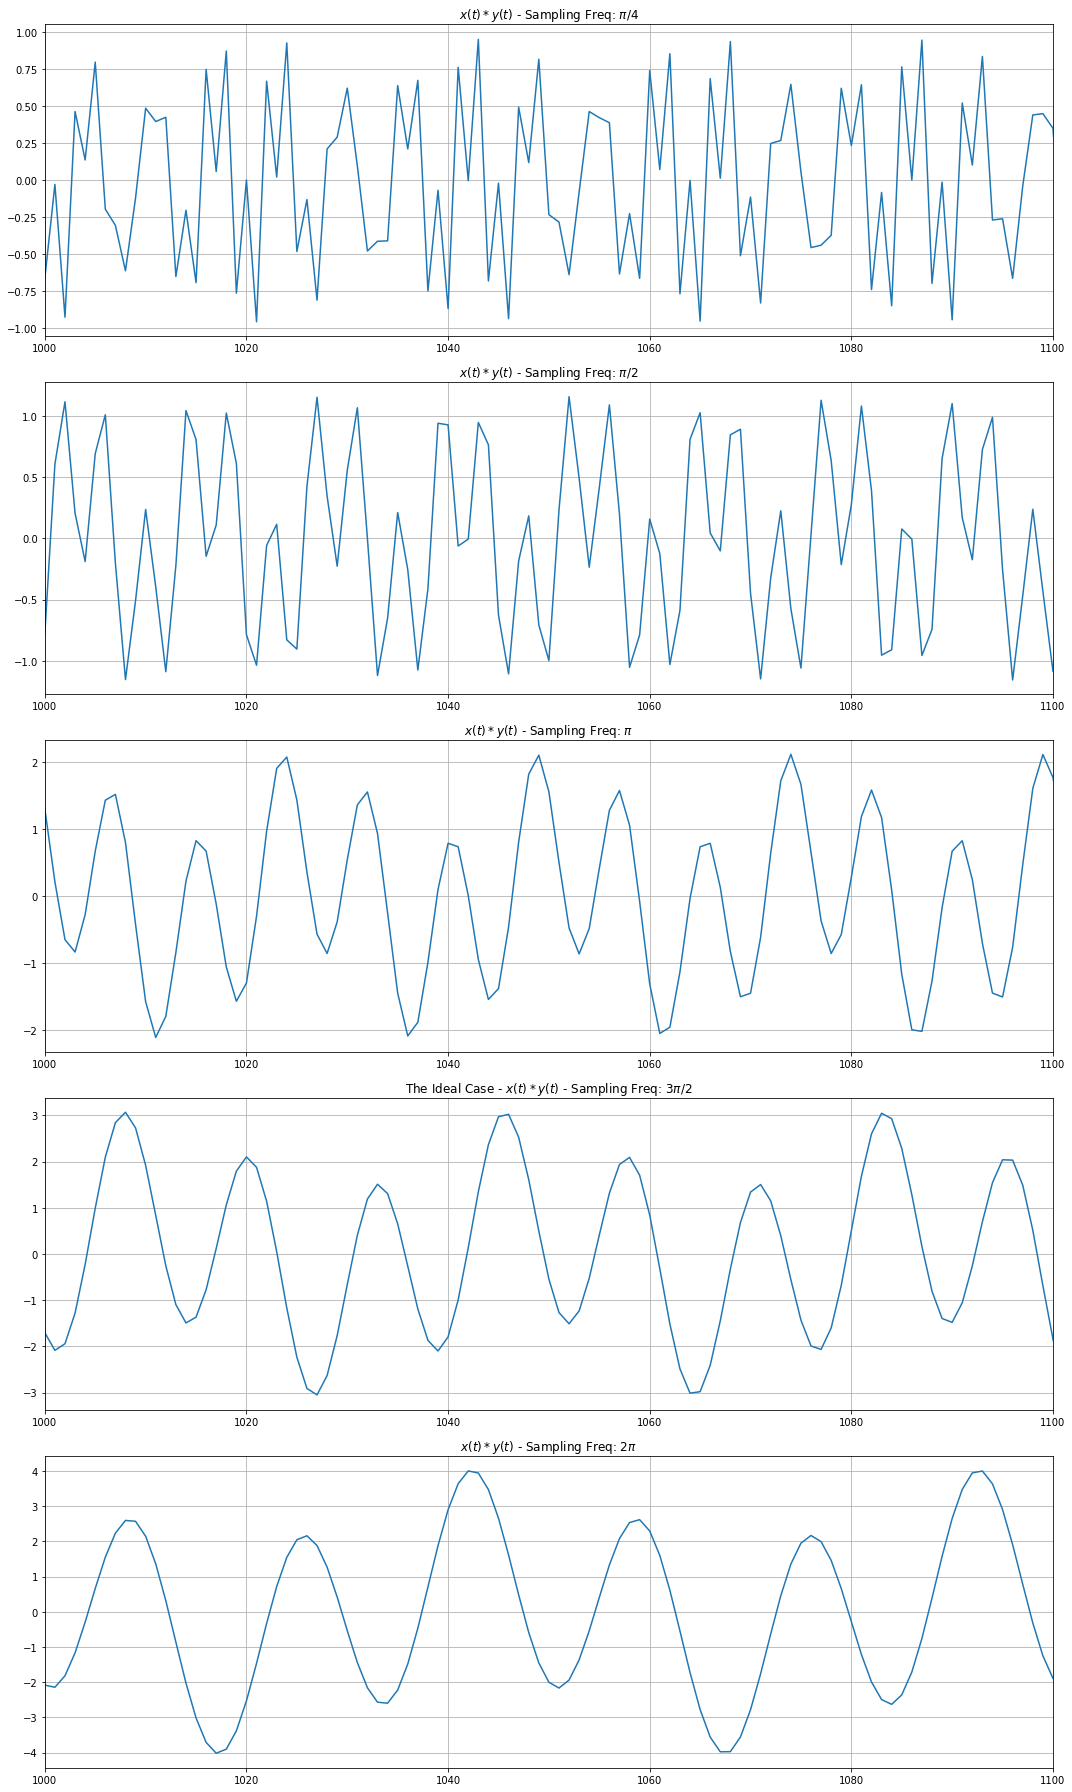

In [21]:
# Please note that all the frequencies are represented as angular frequencies
fig = plt.figure(figsize=(15, 25))
gs = gridspec.GridSpec(5, 1)

sample_freq = np.pi/4
sample_period = 1/sample_freq
duration = 10000
length = sample_freq * duration
t = np.arange(length)*sample_period
x2 = np.sin(3*np.pi*t/4 + np.pi/2)
y2 = np.sin(np.pi*t/4 + 3*np.pi/5)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(convolution(x2, y2))
ax1.grid()
ax1.set_xlim(left=1000, right=1100)
ax1.set_title("$x(t)*y(t)$ - Sampling Freq: $\pi/4$")

sample_freq = np.pi/2
sample_period = 1/sample_freq
length = sample_freq * duration
t = np.arange(length)*sample_period
x2 = np.sin(3*np.pi*t/4 + np.pi/2)
y2 = np.sin(np.pi*t/4 + 3*np.pi/5)

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(convolution(x2, y2))
ax2.grid()
ax2.set_xlim(left=1000, right=1100)
ax2.set_title("$x(t)*y(t)$ - Sampling Freq: $\pi/2$")

sample_freq = np.pi
sample_period = 1/sample_freq
length = sample_freq * duration
t = np.arange(length)*sample_period
x2 = np.sin(3*np.pi*t/4 + np.pi/2)
y2 = np.sin(np.pi*t/4 + 3*np.pi/5)

ax3 = fig.add_subplot(gs[2, 0])
ax3.plot(convolution(x2, y2))
ax3.grid()
ax3.set_xlim(left=1000, right=1100)
ax3.set_title("$x(t)*y(t)$ - Sampling Freq: $\pi$")

sample_freq = 3*np.pi/2
sample_period = 1/sample_freq
length = sample_freq * duration
t = np.arange(length)*sample_period
x2 = np.sin(3*np.pi*t/4 + np.pi/2)
y2 = np.sin(np.pi*t/4 + 3*np.pi/5)

ax4 = fig.add_subplot(gs[3, 0])
ax4.plot(convolution(x2, y2))
ax4.grid()
ax4.set_xlim(left=1000, right=1100)
ax4.set_title("The Ideal Case - $x(t)*y(t)$ - Sampling Freq: $3\pi/2$")

sample_freq = 2*np.pi
sample_period = 1/sample_freq
length = sample_freq * duration
t = np.arange(length)*sample_period
x2 = np.sin(3*np.pi*t/4 + np.pi/2)
y2 = np.sin(np.pi*t/4 + 3*np.pi/5)

ax5 = fig.add_subplot(gs[4, 0])
ax5.plot(convolution(x2, y2))
ax5.grid()
ax5.set_xlim(left=1000, right=1100)
ax5.set_title("$x(t)*y(t)$ - Sampling Freq: $2\pi$")

gs.tight_layout(fig)
plt.show()

# Question 4

_Read the sound files and plot their graphics separately in time and frequency domain._

In [22]:
sampling_freq, ilber = wavfile.read("Q4/ilber_ortaylı.wav")
sampling_freq, esg = wavfile.read("Q4/esg.wav")
ilber_L = ilber[:,0]; ilber_R = ilber[:,1]
esg_L = esg[:,0]; esg_R = esg[:,1]

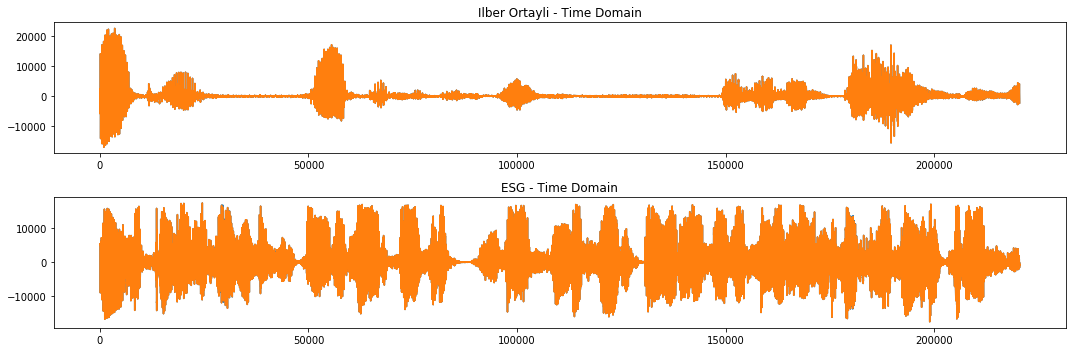

In [23]:
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(ilber)
ax1.set_title("Ilber Ortayli - Time Domain")

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(esg)
ax2.set_title("ESG - Time Domain")

gs.tight_layout(fig)
plt.show()

In [24]:
ipd.Audio(ilber_L, rate=sampling_freq)

In [25]:
ipd.Audio(esg_L, rate=sampling_freq)

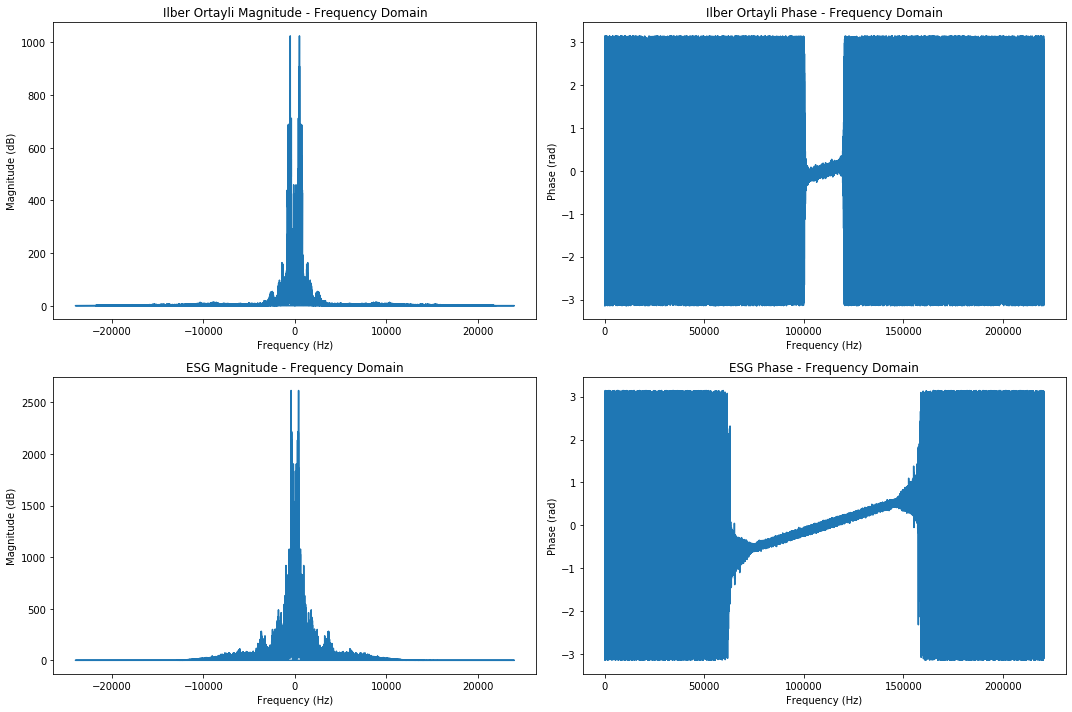

In [26]:
ilber_freqs = np.fft.fftfreq(len(ilber_L))*sampling_freq
esg_freqs = np.fft.fftfreq(len(esg_L))*sampling_freq

ilber_L_norm = ilber_L/max(abs(ilber_L))
ilber_fft = np.fft.fft(ilber_L_norm)
ilber_magn = np.abs(ilber_fft)
ilber_phase = np.angle(ilber_fft)

esg_L_norm = esg_L/max(abs(esg_L))
esg_fft = np.fft.fft(esg_L_norm)
esg_magn = np.abs(esg_fft)
esg_phase = np.angle(esg_fft)

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Magnitude (dB)")
ax1.plot(ilber_freqs, ilber_magn)
ax1.set_title("Ilber Ortayli Magnitude - Frequency Domain")

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Phase (rad)")
ax2.plot(ilber_phase)
ax2.set_title("Ilber Ortayli Phase - Frequency Domain")

ax3 = fig.add_subplot(gs[1, 0])
ax3.set_xlabel("Frequency (Hz)")
ax3.set_ylabel("Magnitude (dB)")
ax3.plot(esg_freqs, esg_magn)
ax3.set_title("ESG Magnitude - Frequency Domain")

ax4 = fig.add_subplot(gs[1, 1])
ax4.set_xlabel("Frequency (Hz)")
ax4.set_ylabel("Phase (rad)")
ax4.plot(esg_phase)
ax4.set_title("ESG Phase - Frequency Domain")

gs.tight_layout(fig)
plt.show()

_Filter the sound signals with a lowpass filter to obtain bandlimited signals._

In [27]:
def butter_lp(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered = filtfilt(b, a, data)
    return filtered

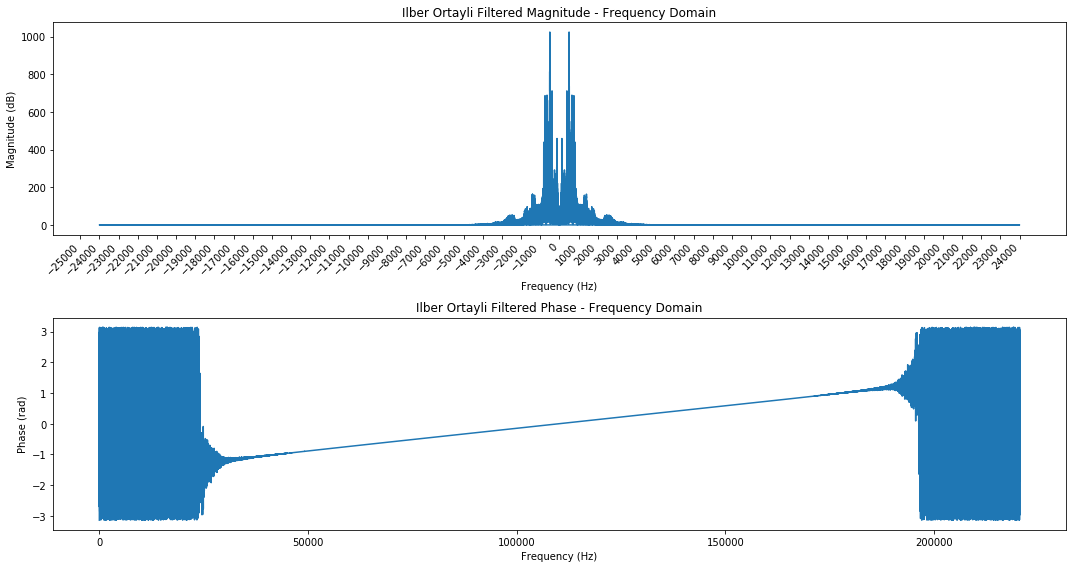

In [28]:
ilber_cutoff = 4000
ilber_filtered = butter_lp(ilber_L, ilber_cutoff, sampling_freq, 5)

ilber_filtered_freqs = np.fft.fftfreq(len(ilber_filtered))*sampling_freq

ilber_filtered_norm = ilber_filtered/max(abs(ilber_filtered))
ilber_filtered_fft = np.fft.fft(ilber_filtered_norm)
ilber_filtered_magn = np.abs(ilber_filtered_fft)
ilber_filtered_phase = np.angle(ilber_filtered_fft)

fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Magnitude (dB)")
ax1.set_xticks(np.arange(-25000, 25000, step=1000))
plt.draw()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.plot(ilber_filtered_freqs, ilber_filtered_magn)
ax1.set_title("Ilber Ortayli Filtered Magnitude - Frequency Domain")

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Phase (rad)")
ax2.plot(ilber_filtered_phase)
ax2.set_title("Ilber Ortayli Filtered Phase - Frequency Domain")

gs.tight_layout(fig)
plt.show()

ipd.Audio(ilber_filtered, rate=sampling_freq)

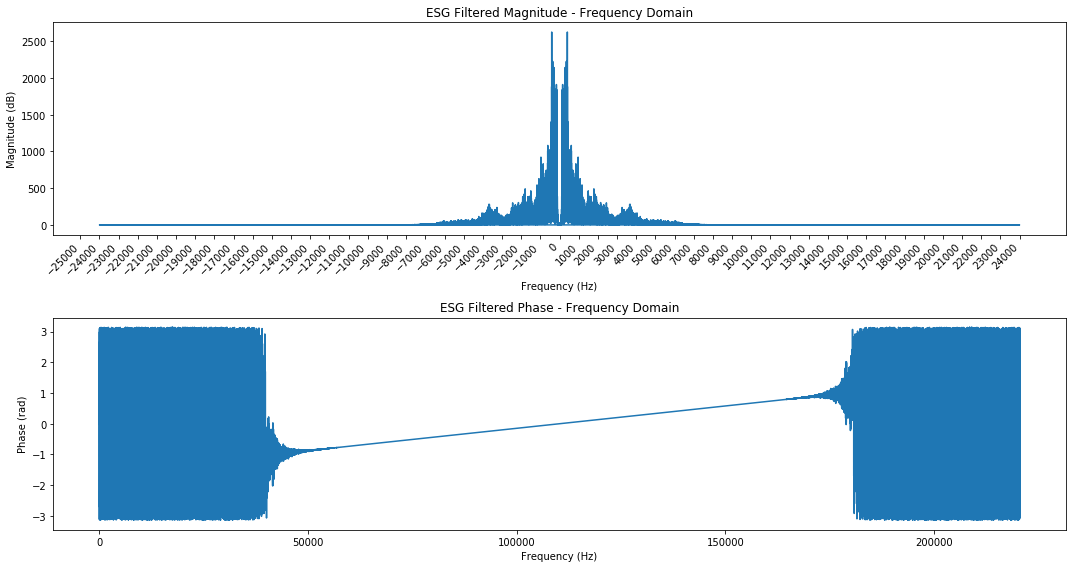

In [29]:
esg_cutoff = 6000
esg_filtered = butter_lp(esg_L, esg_cutoff, sampling_freq, 5)

esg_filtered_freqs = np.fft.fftfreq(len(esg_filtered))*sampling_freq

esg_filtered_norm = esg_filtered/max(abs(esg_filtered))
esg_filtered_fft = np.fft.fft(esg_filtered_norm)
esg_filtered_magn = np.abs(esg_filtered_fft)
esg_filtered_phase = np.angle(esg_filtered_fft)

fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Magnitude (dB)")
ax1.set_xticks(np.arange(-25000, 25000, step=1000))
plt.draw()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.plot(esg_filtered_freqs, esg_filtered_magn)
ax1.set_title("ESG Filtered Magnitude - Frequency Domain")

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Phase (rad)")
ax2.plot(esg_filtered_phase)
ax2.set_title("ESG Filtered Phase - Frequency Domain")

gs.tight_layout(fig)
plt.show()

ipd.Audio(esg_filtered, rate=sampling_freq)

_Please briefly explain why signals should be bandlimited before the modulation process. Which problems arise if we do not use bandlimited signals in amplitude modulation?_
* The signals should be bandlimited before modulation otherwise their bandwith may not be enough to carry the full range of frequencies. In that case, the signal will interfere with other signals on different carriers and the audio will sound as if it was corrupted.

_Produce two different carrier signals to appropriate the bandwidth you decide. Write down the frequencies of the carrier signals clearly and briefly explain why you choose these frequencies._
* The chosen carrier frequency for Ilber Ortayli's voice is 5000 hertz and the chosen carrier frequency for ESG's voice is 16000 hertz. These frequencies are chosen after testing out a few general carrier frequency combinations as they sounded reasonable the best. Since cutoff frequency, or in other words the bandwith of Ilber Ortayli's voice is 4000 hertz, width of the carrier should accommodate for it. The range of Ilber's voice on the FDM will be from $5000 - 4000 = 1000$ hertz to $5000 + 4000 = 9000$ hertz. In order for ESG's and Ilber's voices not to interrupt each other, ESG's voice range should start from at least 9000 hertz. So, due to ESG's voice having a bandwith of 6000 hertz, its carrier frequency is chosen as 16000. Since, $16000 - 6000 = 10000$ hertz will not interfere with Ilber's voice.

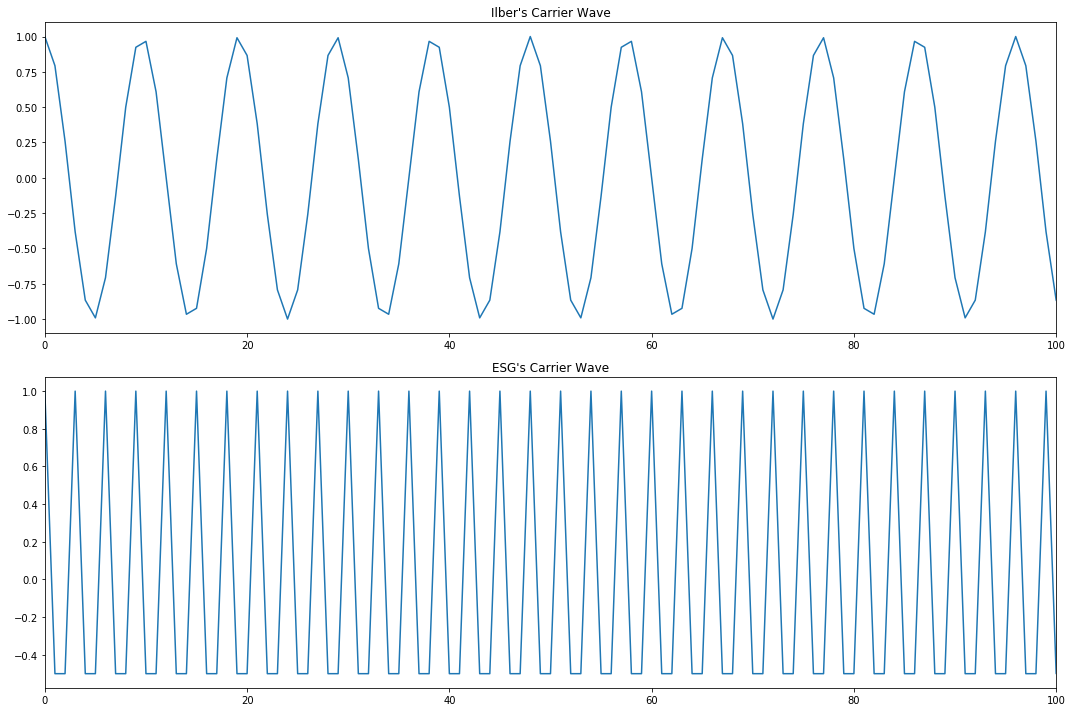

In [30]:
ilber_t = np.arange(ilber.shape[0])/sampling_freq
ilber_carrier_amp = 1    #10*max(ilber_L)
ilber_carrier_freq = 5000
ilber_carrier = ilber_carrier_amp*np.cos(2*np.pi*ilber_carrier_freq*ilber_t)

esg_t = np.arange(esg.shape[0])/sampling_freq
esg_carrier_amp = 1    #10*max(esg_L)
esg_carrier_freq = 16000
esg_carrier = esg_carrier_amp*np.cos(2*np.pi*esg_carrier_freq*esg_t)

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(ilber_carrier)
ax1.set_xlim(left=0, right=100)
ax1.set_title("Ilber's Carrier Wave")

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(esg_carrier)
ax2.set_xlim(left=0, right=100)
ax2.set_title("ESG's Carrier Wave")

gs.tight_layout(fig)
plt.show()

_Obtain amplitude modulation of the sound signals with carrier signals and stack these signals into a single signal. Then, plot the stacked signal in time and frequency domain._

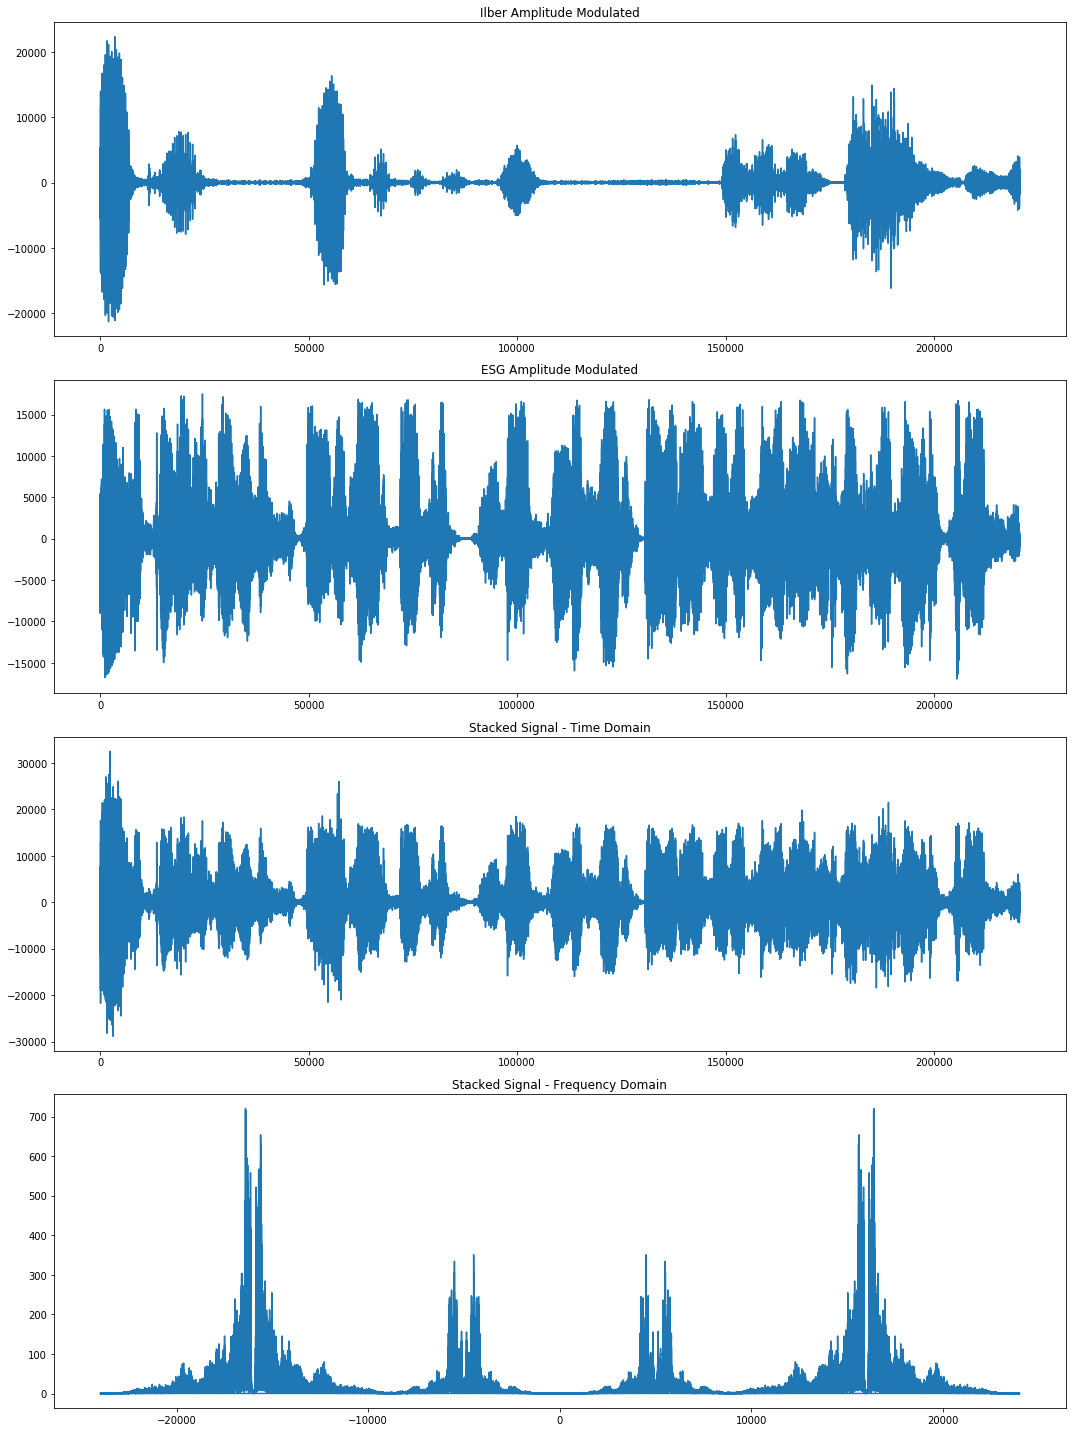

In [31]:
ilber_am = ilber_carrier*ilber_filtered
esg_am = esg_carrier*esg_filtered
stacked = ilber_am + esg_am

stacked_freqs = np.fft.fftfreq(len(stacked))*sampling_freq

stacked_norm = stacked/max(abs(stacked))
stacked_fft = np.fft.fft(stacked_norm)
stacked_magn = np.abs(stacked_fft)

fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(4, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(ilber_am)
ax1.set_title("Ilber Amplitude Modulated")

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(esg_am)
ax2.set_title("ESG Amplitude Modulated")

ax3 = fig.add_subplot(gs[2, 0])
ax3.plot(stacked)
ax3.set_title("Stacked Signal - Time Domain")

ax4 = fig.add_subplot(gs[3, 0])
ax4.plot(stacked_freqs, stacked_magn)
ax4.set_title("Stacked Signal - Frequency Domain")

gs.tight_layout(fig)
plt.show()

_Implement demodulator. Plot the graphics of the results at each step of the diagram. Write the filter parameters of your choice clearly for both filters and briefly describe what you have chosen. Explain why these filters are used in the demodulator._
* Bandpass Filter Parameters for Ilber's Voice: 
    * Low Cut-off Freq: 1000 Hertz (Carrier Freq - Bandwith)
    * High Cut-off Freq: 9000 Hertz (Carrier Freq + Bandwith)
    * Sampling Freq: 44100 Hertz (Sampling Rate of the Audio)
    * Order: 5th (Well balanced performance)
* Lowpass Filter Parameters for Ilber's Voice: 
    * Cut-off Freq: 5000 Hertz (Information is Around the Carrier Freq)
    * Sampling Freq: 44100 Hertz
    * Order: 5th
* Bandpass Filter Parameters for ESG's Voice: 
    * Low Cut-off Freq: 10000 Hertz (Carrier Freq - Bandwith)
    * High Cut-off Freq: 22000 Hertz (Carrier Freq + Bandwith)
    * Sampling Freq: 44100 Hertz (Sampling Rate of the Audio)
    * Order: 5th (Well balanced performance)
* Lowpass Filter Parameters for ESG's Voice: 
    * Cut-off Freq: 6000 Hertz (Information is Around the Carrier Freq)
    * Sampling Freq: 44100 Hertz
    * Order: 5th


* All the parameters and their reasonings are given above. To summarize, information of the audio that is being carried by the carrier signal is around its frequency. In order to extract that information bandpass filter is used first. Then the carrier signal is eliminated and a lowpass filter is used to obtain the original signal.

In [32]:
def butter_bp(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    filtered = filtfilt(b, a, data)
    return filtered

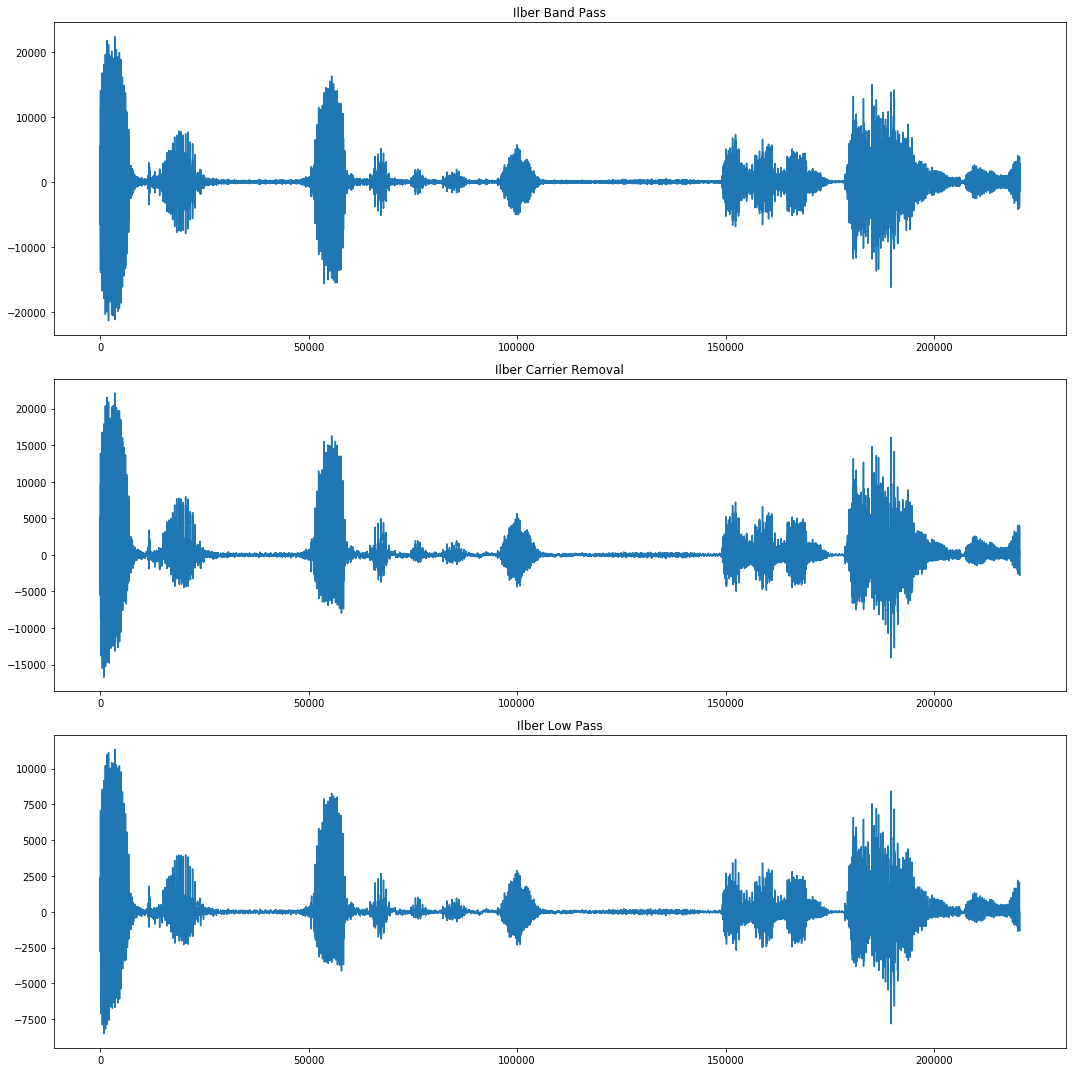

In [33]:
ilber_demodulated1 = butter_bp(stacked, ilber_carrier_freq-ilber_cutoff, ilber_carrier_freq+ilber_cutoff, sampling_freq)
ilber_demodulated2 = ilber_demodulated1*ilber_carrier
ilber_demodulated3 = butter_lp(ilber_demodulated2, ilber_cutoff, sampling_freq, 5)
ilber_demodulated = ilber_demodulated3/max(ilber_demodulated3)

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(3, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(ilber_demodulated1)
ax1.set_title("Ilber Band Pass")

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(ilber_demodulated2)
ax2.set_title("Ilber Carrier Removal")

ax3 = fig.add_subplot(gs[2, 0])
ax3.plot(ilber_demodulated3)
ax3.set_title("Ilber Low Pass")

gs.tight_layout(fig)
plt.show()

librosa.output.write_wav("Q4/ilber_demodulated.wav", ilber_demodulated, sampling_freq)
ipd.Audio(ilber_demodulated, rate=sampling_freq)

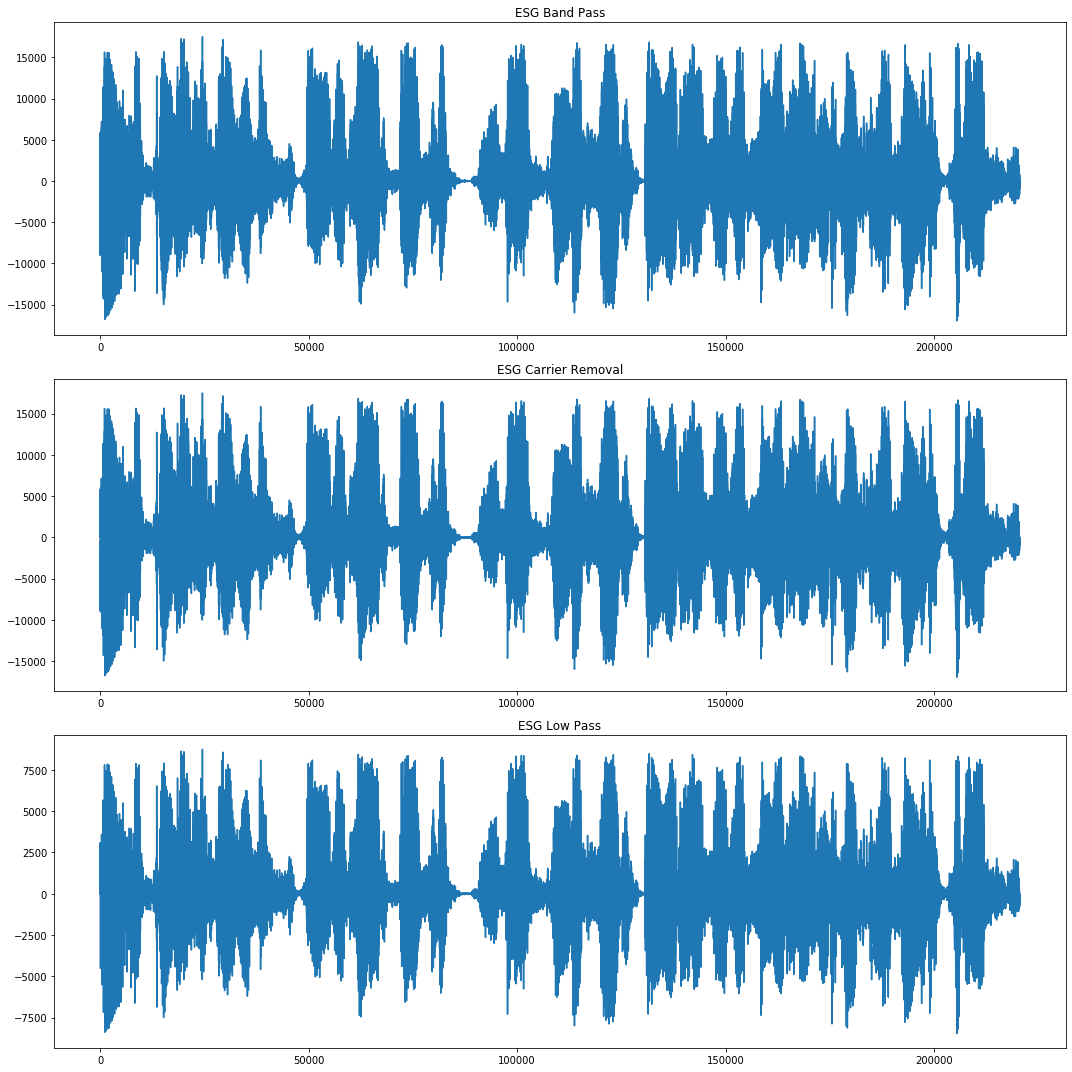

In [34]:
esg_demodulated1 = butter_bp(stacked, esg_carrier_freq-esg_cutoff, esg_carrier_freq+esg_cutoff, sampling_freq)
esg_demodulated2 = esg_demodulated1*esg_carrier
esg_demodulated3 = butter_lp(esg_demodulated2, esg_cutoff, sampling_freq, 5)
esg_demodulated = esg_demodulated3/max(esg_demodulated3)

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(3, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(esg_demodulated1)
ax1.set_title("ESG Band Pass")

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(esg_demodulated2)
ax2.set_title("ESG Carrier Removal")

ax3 = fig.add_subplot(gs[2, 0])
ax3.plot(esg_demodulated3)
ax3.set_title("ESG Low Pass")

gs.tight_layout(fig)
plt.show()

librosa.output.write_wav("Q4/esg_demodulated.wav", esg_demodulated, sampling_freq)
ipd.Audio(esg_demodulated, rate=sampling_freq)

_Compare reconstructed signals with original ones using graphs in frequency and time domain._
* It's clear that reconstructed signals are limited to previously set frequencies. This is due to Butterworth lowpass used at the last stage of demultiplexing. Their amplitudes are also split in half, however normalization at the output solves the issues with the volume of the audio.

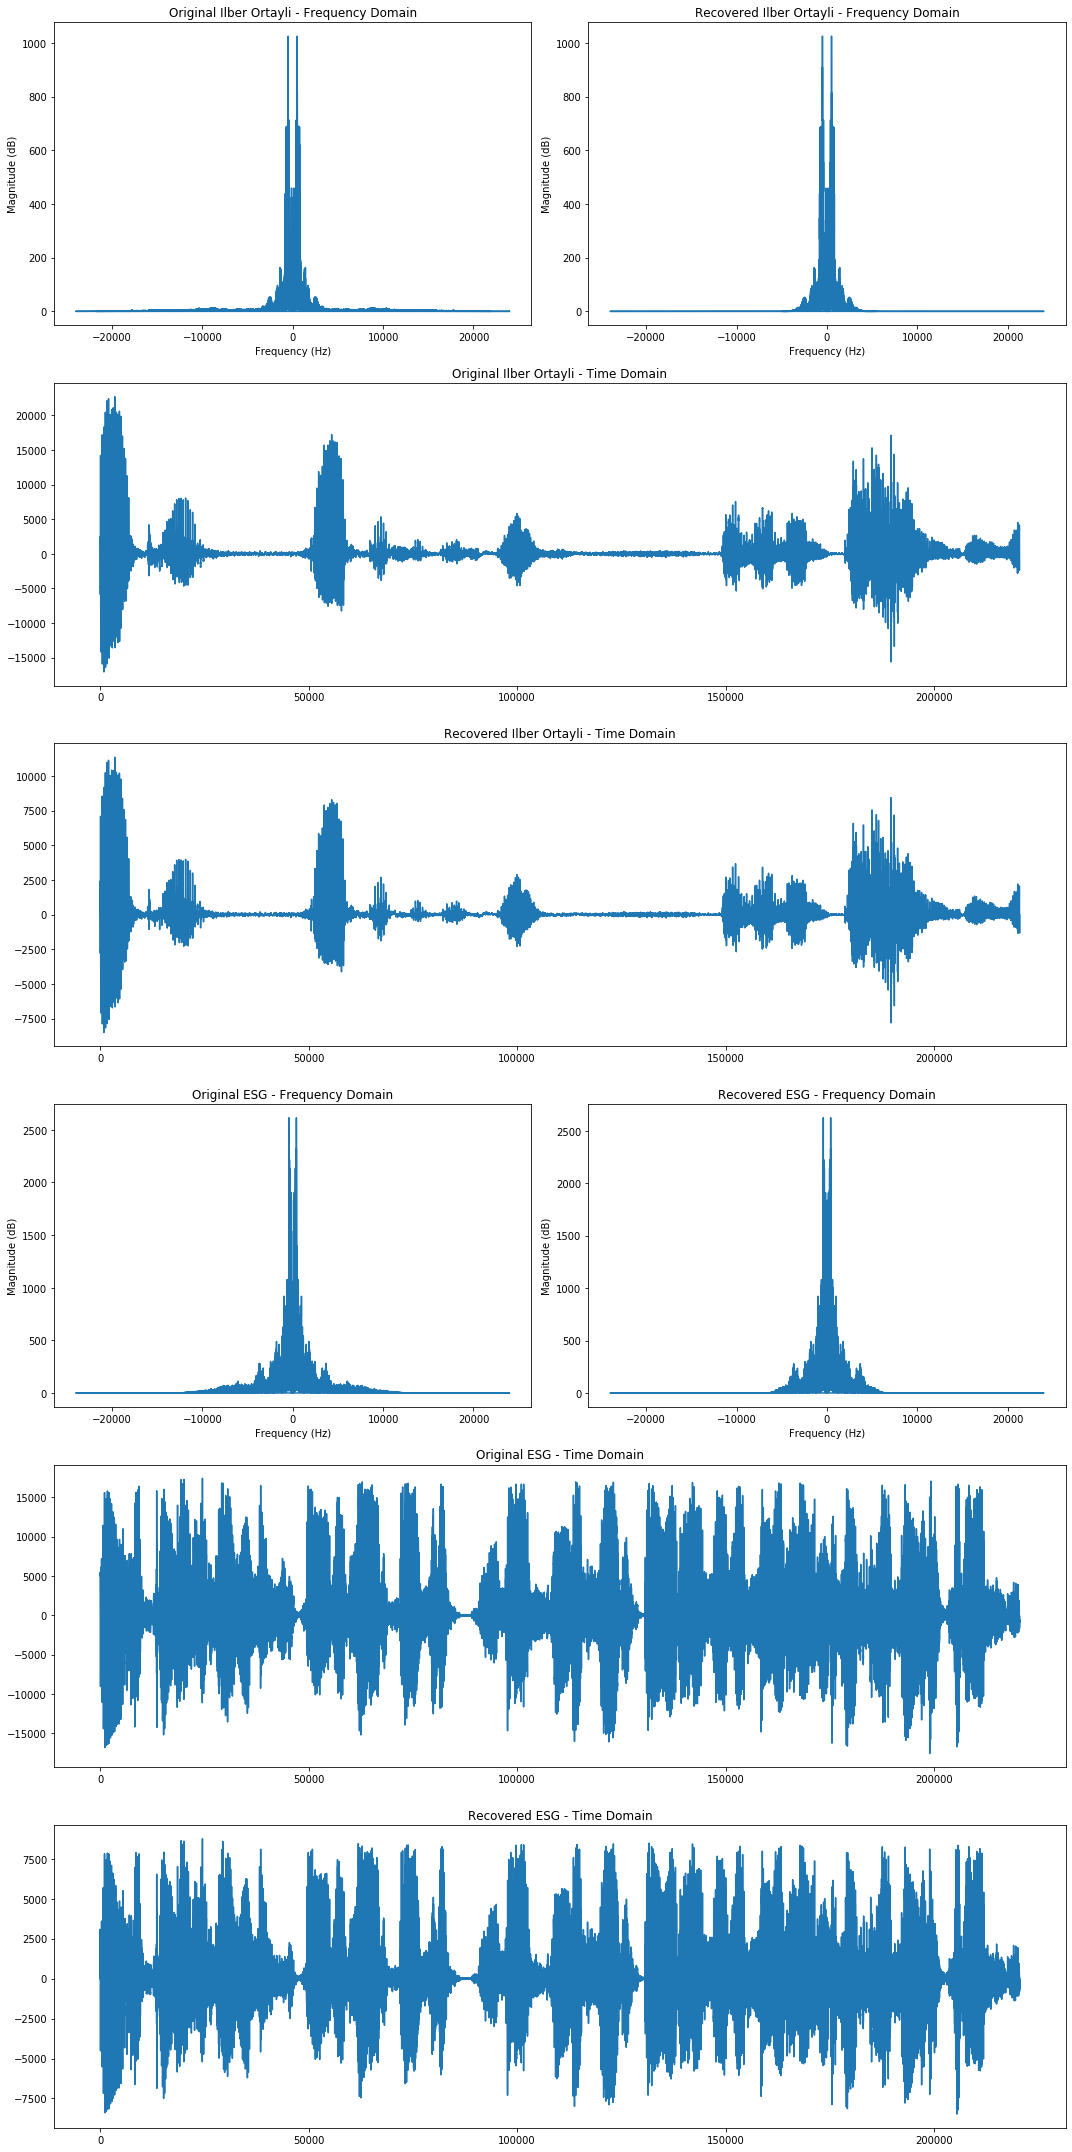

In [35]:
ilber_freqs = np.fft.fftfreq(len(ilber_L))*sampling_freq
esg_freqs = np.fft.fftfreq(len(esg_L))*sampling_freq
ilber_d_freqs = np.fft.fftfreq(len(ilber_demodulated))*sampling_freq
esg_d_freqs = np.fft.fftfreq(len(esg_demodulated))*sampling_freq

ilber_d_magn = np.abs(np.fft.fft(ilber_demodulated/max(abs(ilber_demodulated))))
esg_d_magn = np.abs(np.fft.fft(esg_demodulated/max(abs(esg_demodulated))))

fig = plt.figure(figsize=(15, 30))
gs = gridspec.GridSpec(6, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Magnitude (dB)")
ax1.plot(ilber_freqs, ilber_magn)
ax1.set_title("Original Ilber Ortayli - Frequency Domain")

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Magnitude (dB)")
ax2.plot(ilber_d_freqs, ilber_d_magn)
ax2.set_title("Recovered Ilber Ortayli - Frequency Domain")

ax3 = fig.add_subplot(gs[1, :])
ax3.plot(ilber_L)
ax3.set_title("Original Ilber Ortayli - Time Domain")

ax4 = fig.add_subplot(gs[2, :])
ax4.plot(ilber_demodulated3)
ax4.set_title("Recovered Ilber Ortayli - Time Domain")

ax5 = fig.add_subplot(gs[3, 0])
ax5.set_xlabel("Frequency (Hz)")
ax5.set_ylabel("Magnitude (dB)")
ax5.plot(esg_freqs, esg_magn)
ax5.set_title("Original ESG - Frequency Domain")

ax6 = fig.add_subplot(gs[3, 1])
ax6.set_xlabel("Frequency (Hz)")
ax6.set_ylabel("Magnitude (dB)")
ax6.plot(esg_d_freqs, esg_d_magn)
ax6.set_title("Recovered ESG - Frequency Domain")

ax7 = fig.add_subplot(gs[4, :])
ax7.plot(esg_L)
ax7.set_title("Original ESG - Time Domain")

ax8 = fig.add_subplot(gs[5, :])
ax8.plot(esg_demodulated3)
ax8.set_title("Recovered ESG - Time Domain")

gs.tight_layout(fig)
plt.show()

_Write a function that saves the reconstructed audio file of the desired historian using your implementations above. Briefly interpret the reconstructed sounds and state your observations._
* Reconstructed sounds are a little less clear and a bit more bass heavy. This is due to concentration of low frequencies in a not so wide bandwith. Other than that thanks to the normalization at the output, volume levels are equal and the listening experience is quite decent.

In [36]:
def save_reconstructed(historian, output_dir="Q4/temp.wav", ilber_bandwith=4000, esg_bandwith=6000, ilber_carrier_freq=5000, esg_carrier_freq=16000):
    sampling_freq, ilber = wavfile.read("Q4/ilber_ortaylı.wav")
    sampling_freq, esg = wavfile.read("Q4/esg.wav")
    ilber_L = ilber[:,0]
    esg_L = esg[:,0]
    
    ilber_cutoff = ilber_bandwith
    ilber_filtered = butter_lp(ilber_L, ilber_cutoff, sampling_freq, 5)
    esg_cutoff = esg_bandwith
    esg_filtered = butter_lp(esg_L, esg_cutoff, sampling_freq, 5)
    
    ilber_t = np.arange(ilber.shape[0])/sampling_freq
    ilber_carrier_amp = 1    #10*max(ilber_L)
    ilber_carrier = ilber_carrier_amp*np.cos(2*np.pi*ilber_carrier_freq*ilber_t)

    esg_t = np.arange(esg.shape[0])/sampling_freq
    esg_carrier_amp = 1    #10*max(esg_L)
    esg_carrier = esg_carrier_amp*np.cos(2*np.pi*esg_carrier_freq*esg_t)
    
    ilber_am = ilber_carrier*ilber_L
    esg_am = esg_carrier*esg_L
    stacked = ilber_am + esg_am
    
    
    if historian == "esg":
        esg_demodulated = butter_bp(stacked, esg_carrier_freq-esg_cutoff, esg_carrier_freq+esg_cutoff, sampling_freq)
        esg_demodulated = esg_demodulated*esg_carrier
        esg_demodulated = butter_lp(esg_demodulated, esg_cutoff, sampling_freq, 5)
        esg_demodulated /= max(esg_demodulated)
        librosa.output.write_wav(output_dir, esg_demodulated, sampling_freq)
    elif historian == "ilber":
        ilber_demodulated = butter_bp(stacked, ilber_carrier_freq-ilber_cutoff, ilber_carrier_freq+ilber_cutoff, sampling_freq)
        ilber_demodulated = ilber_demodulated*ilber_carrier
        ilber_demodulated = butter_lp(ilber_demodulated, ilber_cutoff, sampling_freq, 5)
        ilber_demodulated /= max(ilber_demodulated)
        librosa.output.write_wav(output_dir, ilber_demodulated, sampling_freq)
    else:
        print("Please enter a valid option.\n'ilber' or 'esg'")

In [37]:
save_reconstructed(historian="ilber", output_dir="Q4/ilber_saved.wav")
save_reconstructed(historian="esg", output_dir="Q4/esg_saved.wav")

_Run again FDM system you implemented above with overlapping carrier frequencies and listen reconstructed sound signals. Briefly explain your observations._
* It is obvious that with the overlap of around 50%, reconstructing Ilber's voice brings in some of the high pitch "chirping" noises from ESG's audio file.

In [38]:
save_reconstructed("ilber", "Q4/overlapping.wav", ilber_bandwith=4000, ilber_carrier_freq=5000, esg_bandwith=6000, esg_carrier_freq=12000)
sampling_freq, overlapping = wavfile.read("Q4/overlapping.wav")
ipd.Audio(overlapping, rate=sampling_freq)